In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os
import numpy as np
import pandas as pd
from shutil import copyfile
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from keras import layers as L
from keras.models import Model,load_model
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping


In [7]:
datagen = ImageDataGenerator(rotation_range=20,
                             shear_range=10,
                             validation_split=0.2)

train_generator = datagen.flow_from_directory('/Final_Model/images/',
                                              target_size=(28,28),
                                              subset='training')

val_generator = datagen.flow_from_directory('/Final_Model/images/',
                                            target_size=(28,28),
                                            subset='validation')

Found 1248 images belonging to 26 classes.
Found 312 images belonging to 26 classes.


In [8]:
model = load_model('/Final_Model/BrailleNet.h5')
model_ckpt = ModelCheckpoint('/Final_Model/BrailleNet.h5',save_best_only=True)
reduce_lr = ReduceLROnPlateau(patience=8,verbose=0)
early_stop = EarlyStopping(patience=15,verbose=1)
history = model.fit(train_generator,
                              validation_data=val_generator,
                              epochs=20,
                              callbacks=[model_ckpt,reduce_lr,early_stop],
                              verbose=1)
acc = model.evaluate(val_generator)[1]
print('model accuracy: {}'.format(round(acc,4)))

Epoch 1/20
39/39 [==============================] - 817s 21s/step - loss: 0.1086 - accuracy: 0.9760 - val_loss: 0.2665 - val_accuracy: 0.9423 - lr: 1.0000e-04
Epoch 2/20
39/39 [==============================] - 5s 140ms/step - loss: 0.1011 - accuracy: 0.9840 - val_loss: 0.2419 - val_accuracy: 0.9391 - lr: 1.0000e-04
Epoch 3/20
39/39 [==============================] - 6s 160ms/step - loss: 0.0919 - accuracy: 0.9816 - val_loss: 0.2332 - val_accuracy: 0.9519 - lr: 1.0000e-04
Epoch 4/20
39/39 [==============================] - 5s 121ms/step - loss: 0.0910 - accuracy: 0.9840 - val_loss: 0.2534 - val_accuracy: 0.9327 - lr: 1.0000e-04
Epoch 5/20
39/39 [==============================] - 5s 125ms/step - loss: 0.0832 - accuracy: 0.9864 - val_loss: 0.2370 - val_accuracy: 0.9359 - lr: 1.0000e-04
Epoch 6/20
39/39 [==============================] - 5s 128ms/step - loss: 0.0831 - accuracy: 0.9840 - val_loss: 0.2185 - val_accuracy: 0.9391 - lr: 1.0000e-04
Epoch 7/20
39/39 [============================

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 separable_conv2d (Separable  (None, 26, 26, 64)       283       
 Conv2D)                                                         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 separable_conv2d_1 (Separab  (None, 11, 11, 128)      8896      
 leConv2D)                                                       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                         

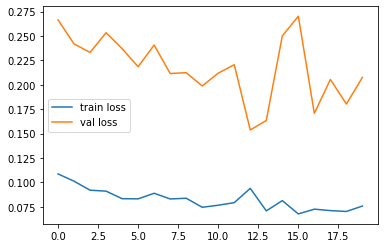

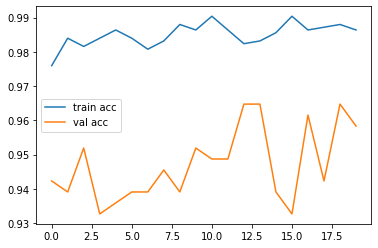

<Figure size 432x288 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [11]:
pred = model.predict(val_generator)
pred

array([[1.44357104e-11, 1.74181920e-07, 1.02921290e-15, ...,
        7.58891261e-08, 8.50179021e-08, 7.77332154e-09],
       [3.31219962e-05, 9.96433377e-01, 7.71453110e-11, ...,
        4.40741186e-18, 1.44181701e-21, 4.48021823e-18],
       [8.24205220e-01, 2.84690054e-06, 1.18344262e-01, ...,
        2.01676335e-06, 2.59984634e-12, 4.46842474e-09],
       ...,
       [1.16837794e-23, 1.39768873e-22, 3.15383909e-15, ...,
        7.47223894e-10, 7.10536332e-22, 6.86676312e-15],
       [4.69996334e-11, 1.85492439e-08, 5.38935208e-09, ...,
        2.77946838e-05, 2.15360305e-05, 9.98127401e-01],
       [2.87027040e-16, 3.49891163e-20, 4.98467830e-11, ...,
        5.77631916e-15, 5.24046926e-24, 8.78316797e-09]], dtype=float32)

In [40]:
import PIL
import random
import string
from tensorflow.keras.preprocessing import image

def image_loader():
  path = random.choice(list(string.ascii_lowercase))
  image_path = f'/Final_Model/Braille Dataset/{path}1.JPG0dim.jpg'
  img=image.load_img(image_path)
  return img

img = image_loader()

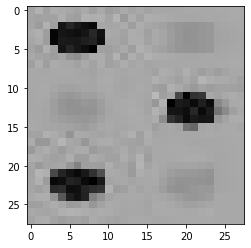

In [41]:
plt.imshow(img)

In [42]:
import numpy as np
x=image.img_to_array(img)
x

array([[[164., 164., 164.],
        [177., 177., 177.],
        [161., 161., 161.],
        ...,
        [169., 169., 169.],
        [170., 170., 170.],
        [170., 170., 170.]],

       [[164., 164., 164.],
        [161., 161., 161.],
        [162., 162., 162.],
        ...,
        [168., 168., 168.],
        [169., 169., 169.],
        [169., 169., 169.]],

       [[165., 165., 165.],
        [156., 156., 156.],
        [177., 177., 177.],
        ...,
        [166., 166., 166.],
        [167., 167., 167.],
        [168., 168., 168.]],

       ...,

       [[159., 159., 159.],
        [160., 160., 160.],
        [167., 167., 167.],
        ...,
        [168., 168., 168.],
        [168., 168., 168.],
        [168., 168., 168.]],

       [[169., 169., 169.],
        [166., 166., 166.],
        [165., 165., 165.],
        ...,
        [168., 168., 168.],
        [168., 168., 168.],
        [168., 168., 168.]],

       [[164., 164., 164.],
        [171., 171., 171.],
        [172., 1

In [43]:
x.shape

(28, 28, 3)

In [44]:
x=np.expand_dims(x,axis=0)
model.predict(x)

array([[5.1110208e-19, 3.0915542e-22, 3.5709109e-13, 1.5973298e-17,
        6.3350156e-04, 4.3952921e-22, 1.7798274e-13, 4.0955178e-15,
        8.9014929e-10, 3.3641917e-16, 7.8913565e-10, 5.3159485e-38,
        1.9004945e-20, 3.7507296e-05, 9.9932897e-01, 3.4076345e-20,
        4.3348913e-25, 2.1723988e-10, 3.3390677e-09, 3.0677912e-20,
        2.2115232e-09, 7.4157042e-25, 3.3982561e-31, 1.1332783e-15,
        1.1545359e-25, 1.4272329e-08]], dtype=float32)

In [45]:
a=np.argmax(model.predict(x), axis=1)
a

array([14])